LISN BARN 2010 - 2011

UBSG CSGN 2014 - 2015

11-12


In [1]:
import seaborn as sns
import statsmodels.tsa.stattools as ts 
import statsmodels.api as sm
from numpy import log, polyfit, sqrt, std, subtract
from datetime import datetime, timedelta
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from dateutil.relativedelta import *

import ffn


from backtester import backtest as bt

%matplotlib inline

In [586]:
PEP = pd.read_csv('C:/Users/jango/code/research_env/BTHE/data/BLKB.csv')
KO = pd.read_csv('C:/Users/jango/code/research_env/BTHE/data/GLKBN.csv')

In [618]:
PEP = pd.read_csv('C:/Users/jango/code/research_env/BTHE/data/UBSG.csv',index_col='Date', parse_dates=True)['Adj Close']
KO = pd.read_csv('C:/Users/jango/code/research_env/BTHE/data/CSGN.csv',index_col='Date', parse_dates=True)['Adj Close']

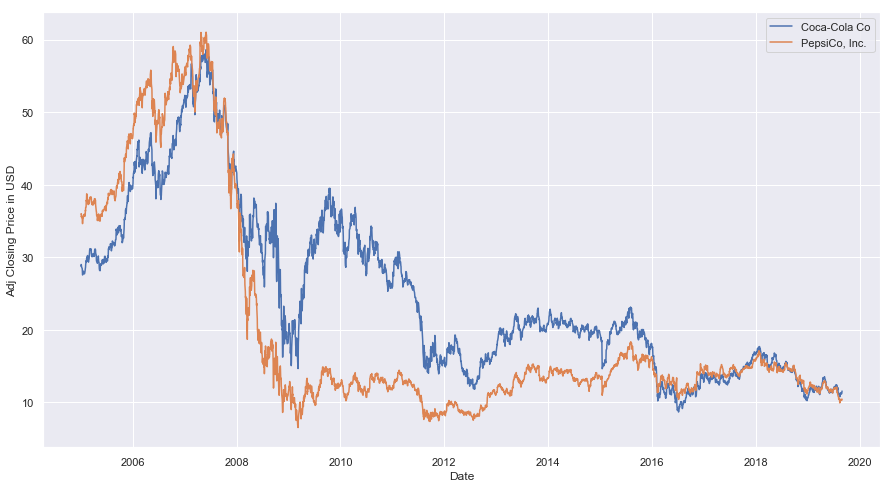

In [619]:
sns.set(rc={'figure.figsize':(15,8)})
c1 = plt.plot(KO, label='Coca-Cola Co')
c1 = plt.plot(PEP, label='PepsiCo, Inc.')
c1 = plt.legend()
c1 = plt.xlabel("Date")
c1 = plt.ylabel("Adj Closing Price in USD")

In [620]:
c1.figure.savefig("closing_prices.png")

In [1063]:
start = "2014-01-01"
mid = "2015-01-01"
PEP_norm = (1 + PEP[start:mid].pct_change()).cumprod()
KO_norm = (1 + KO[start:mid].pct_change()).cumprod()
PEP_norm[0] = 1
KO_norm[0] = 1

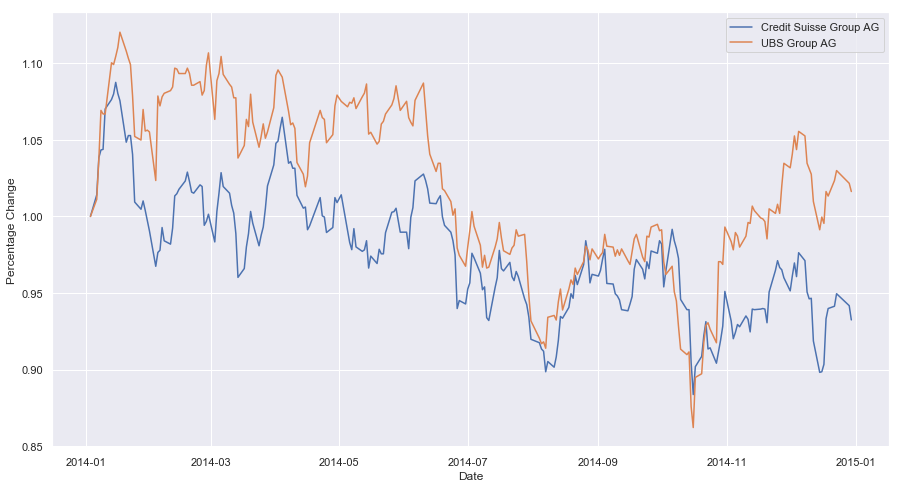

In [1064]:
sns.set(rc={'figure.figsize':(15,8)})
c1 = plt.plot(KO_norm, label='Credit Suisse Group AG')
c1 = plt.plot(PEP_norm, label='UBS Group AG')
c1 = plt.legend()
c1 = plt.xlabel("Date")
c1 = plt.ylabel("Percentage Change")

In [1065]:
#c1.figure.savefig("norm_2015.png")

In [1066]:
s = np.sum((PEP_norm-KO_norm)**2)

In [1067]:
s

0.7506598258572278

In [1068]:
df = pd.DataFrame()
df["CSGN"] = PEP_norm
df['UBSG'] = KO_norm

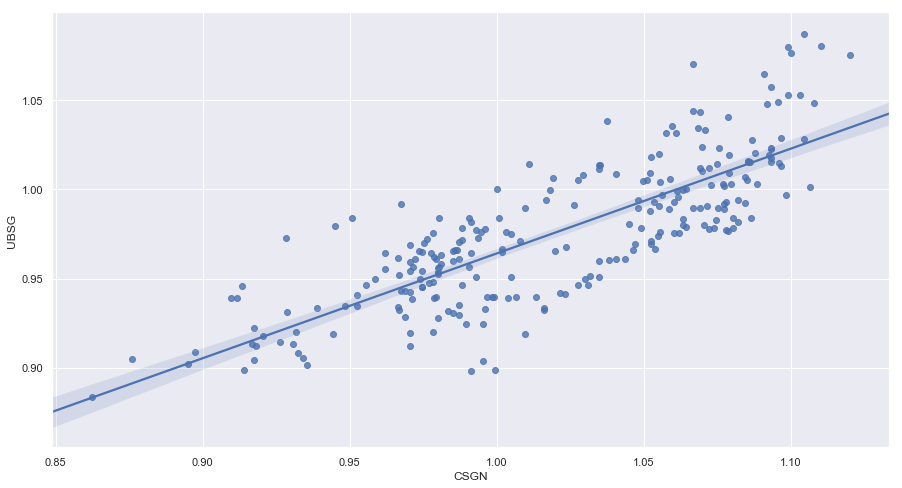

In [1069]:
scat = sns.regplot(x="CSGN", y="UBSG", data=df)
#scat.set(xlabel='PepsiCo, Inc.', ylabel='Coca-Cola Co')

In [1070]:
#scat.figure.savefig("scatter.png")

In [1071]:
start = "2015-01-01"
mid = "2015-07-01"
tPEP = (1 + PEP[start:mid].pct_change()).cumprod()
tKO = (1 + KO[start:mid].pct_change()).cumprod()
tPEP[0] = 1
tKO[0] = 1

In [1179]:
spread = tPEP - tKO

In [1180]:
for_spread = PEP_norm - KO_norm
mean = np.mean(for_spread)
stdev = np.std(for_spread)
upper = mean+2*stdev
lower = mean-2*stdev

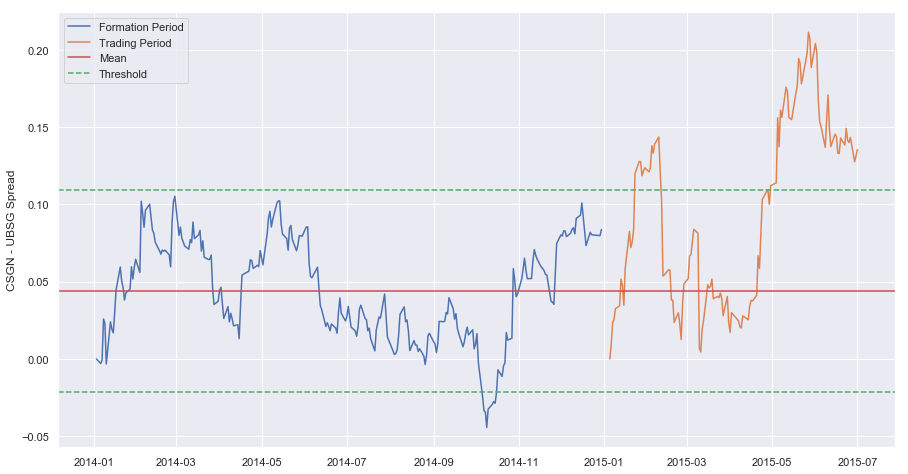

In [1181]:
sprd = plt.plot(for_spread, label='Formation Period')
sprd = plt.plot(spread, label='Trading Period')
sprd = plt.axhline(mean, color='r', linestyle='-', label='Mean')
sprd = plt.axhline(upper, color='g', linestyle='--', label='Threshold')
sprd = plt.axhline(lower, color='g', linestyle='--')
sprd = plt.legend()
sprd = plt.ylabel("CSGN - UBSG Spread")

In [1182]:
#sprd.figure.savefig("formAtrading.png")

In [1183]:
spread = pd.DataFrame(spread)
spread['ret'] = 0
spread.loc['2015-02-11':'2015-02-18', 'ret'] = 1
spread.loc['2015-04-29': , 'ret'] = 1

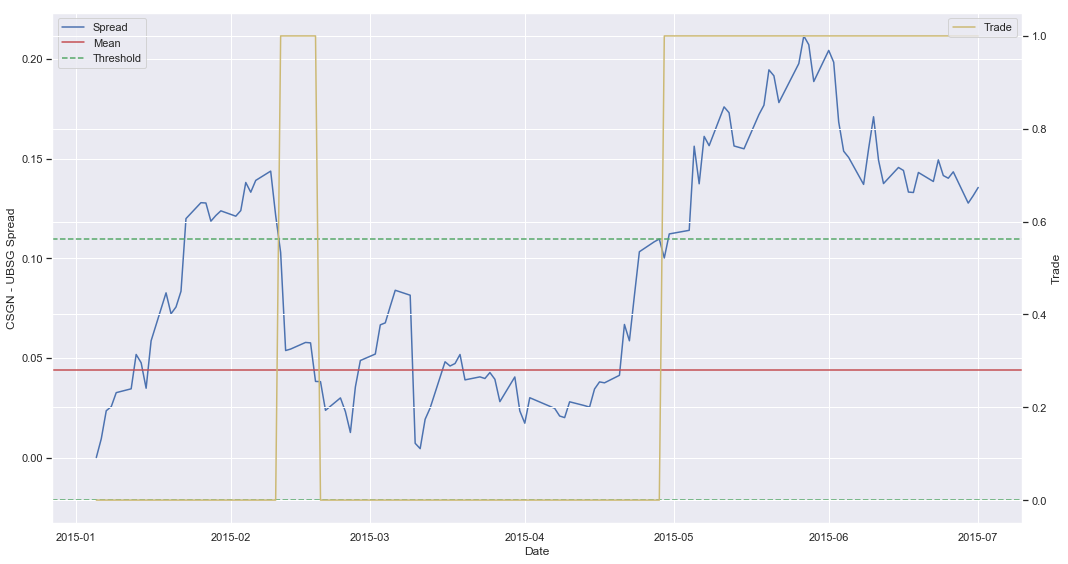

In [1206]:
fig, ax1 = plt.subplots()

trad = ax1.plot(spread['Adj Close'], label='Spread')
trad = ax1.axhline(mean, color='r', linestyle='-', label='Mean')
trad = ax1.axhline(upper, color='g', linestyle='--', label='Threshold')
trad = ax1.axhline(lower, color='g', linestyle='--')
trad = ax1.legend(loc=2)
trad = ax1.set_ylabel("CSGN - UBSG Spread")
trad = ax1.set_xlabel("Date")

ax2 = ax1.twinx()

trad = ax2.plot(spread['ret'], color='y', label='Trade')
trad = ax2.set_ylabel('Trade')
trad = ax2.legend(loc=1)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [1207]:
trad.figure.savefig("tradeexpl.png")